In [52]:
import pandas as pd

df = pd.read_csv('Dry_Bean_Dataset.csv')
y = df.iloc[:,-1]
X = df.iloc[:,0:16]
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


# A giảm chiều và xem sự phân phối

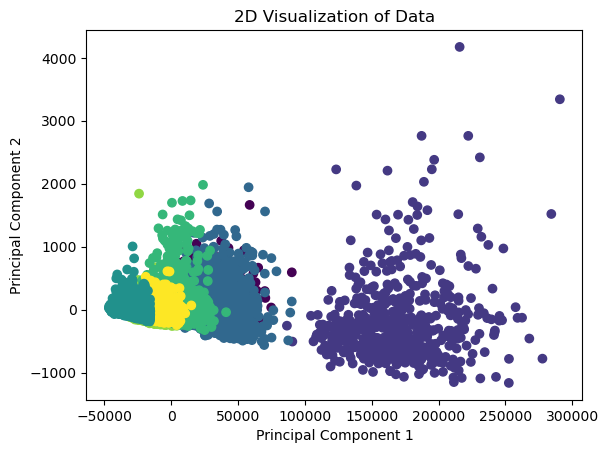

In [53]:

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Chuyển đổi nhãn thành giá trị số
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y)

# Áp dụng PCA để giảm chiều dữ liệu về 100 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Hiển thị biểu đồ scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Data')
plt.show()

# B đánh giá các mô hình

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Accuracy score for Naive Baiyes on train: 0.7634092578986039
Precision score for Naive Baiyes on train: 0.764356695362094
Recall Score For Naive Baiyes on train :  0.7634092578986039
Accuracy score for Naive Bayes : 0.77179236043095
Precision score for Naive Baiyes : 0.770102515070416
Recall Score For Naive Bayes:  0.77179236043095


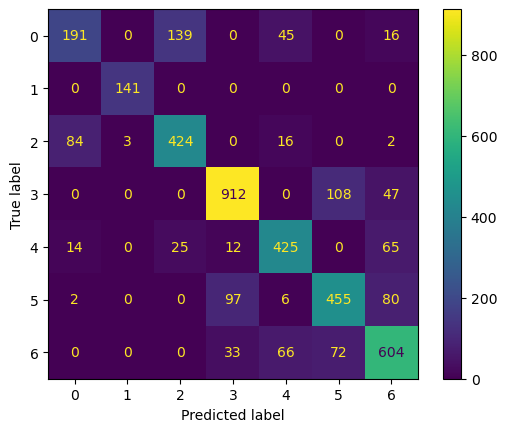

In [55]:
from sklearn.naive_bayes import GaussianNB

#Model
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_train_nb = nb.predict(X_train)

#accuracy score
print("Accuracy score for Naive Baiyes on train:", accuracy_score(y_train, y_pred_train_nb))

#precision score
print("Precision score for Naive Baiyes on train:", precision_score(y_train, y_pred_train_nb,average='weighted'))

#recall score
print("Recall Score For Naive Baiyes on train : ", recall_score(y_train, y_pred_train_nb, average="weighted"))

#predict
y_pred_nb = nb.predict(X_test)

#accuracy score
print("Accuracy score for Naive Bayes :", accuracy_score(y_test, y_pred_nb))

#precision score
print("Precision score for Naive Baiyes :", precision_score(y_test,y_pred_nb,average='weighted'))

#recall score
print("Recall Score For Naive Bayes: ", recall_score(y_test, y_pred_nb, average="weighted"))

#Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_nb)).plot()

Accuracy score for Multinomial Logistic Regression on train: 0.8652251495748924
Precision score for Multinomial Logistic Regression on train: 0.8662460144460183
Recall Score For Multinomial Logistic Regression on train :  0.8652251495748924
Accuracy score for Multinomial Logistictic Regression : 0.8606758080313418
Precision score for Multinomial Logistictic Regression : 0.8625547200039251
Recall Score For Multinomial Logistictic Regression :  0.8606758080313418


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


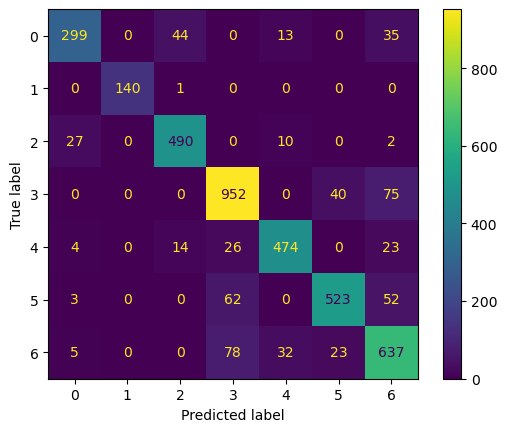

In [56]:
from sklearn.linear_model import LogisticRegression

#Model
lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)

#train pred
y_pred_train_lr= lr.predict(X_train)

#accuracy score
print("Accuracy score for Multinomial Logistic Regression on train:", accuracy_score(y_train, y_pred_train_lr))

#precision score
print("Precision score for Multinomial Logistic Regression on train:", precision_score(y_train, y_pred_train_lr,average='weighted'))

#recall score
print("Recall Score For Multinomial Logistic Regression on train : ", recall_score(y_train, y_pred_train_lr, average="weighted"))

#predict
y_pred_lr = lr.predict(X_test)

#accuracy score
print("Accuracy score for Multinomial Logistictic Regression :", accuracy_score(y_test, y_pred_lr))

#precision score
print("Precision score for Multinomial Logistictic Regression :", precision_score(y_test,y_pred_lr,average='weighted'))

#recall score
print("Recall Score For Multinomial Logistictic Regression : ", recall_score(y_test, y_pred_lr, average="weighted"))

#Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lr)).plot()

Accuracy score for ANN on train: 0.30082922221055947
Precision score for ANN on train: 0.2326002457635278
Recall Score For ANN on train :  0.30082922221055947
Accuracy score for ANN : 0.2962781586679726
Precision score for ANN : 0.2330890036954576
Recall Score For ANN :  0.2962781586679726


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


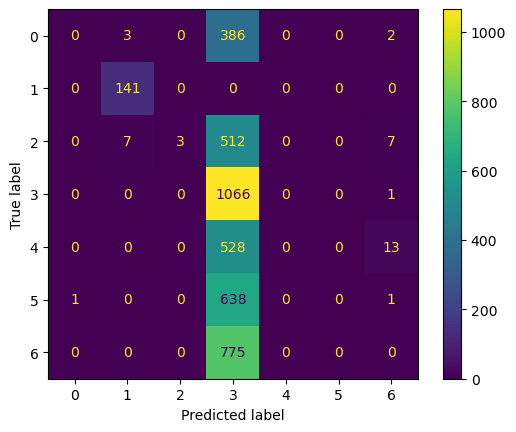

In [57]:
from sklearn.neural_network import MLPClassifier

#Model
ann = MLPClassifier(hidden_layer_sizes=(32,), activation='identity')
ann.fit(X_train, y_train)

#train pred
y_pred_train_ann= ann.predict(X_train)

#accuracy score
print("Accuracy score for ANN on train:", accuracy_score(y_train, y_pred_train_ann))

#precision score
print("Precision score for ANN on train:", precision_score(y_train, y_pred_train_ann,average='weighted'))

#recall score
print("Recall Score For ANN on train : ", recall_score(y_train, y_pred_train_ann, average="weighted"))

#predict
y_pred_ann = ann.predict(X_test)

#accuracy score
print("Accuracy score for ANN :", accuracy_score(y_test, y_pred_ann))

#precision score
print("Precision score for ANN :", precision_score(y_test,y_pred_ann,average='weighted'))

#recall score
print("Recall Score For ANN : ", recall_score(y_test, y_pred_ann, average="weighted"))

#Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ann)).plot()

# C dùng PCA và đánh giá lại

In [58]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=25)

Accuracy score for Naive Baiyes on train: 0.8929358664847277
Precision score for Naive Baiyes on train: 0.8949836921677228
Recall Score For Naive Baiyes on train :  0.8929358664847277
Accuracy score for Naive Bayes on valid: 0.9008325171400587
Precision score for Naive Baiyes on valid: 0.9025281549862285
Recall Score For Naive Bayes on valid:  0.9008325171400587


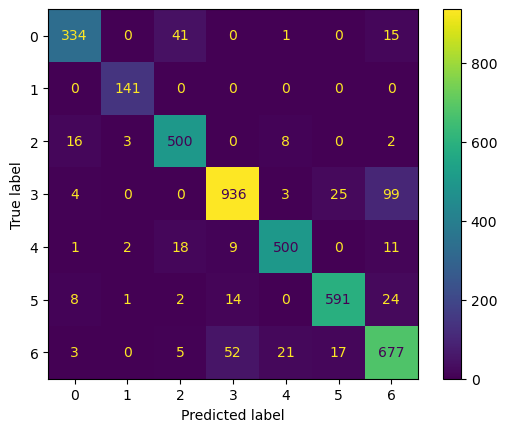

In [59]:
from sklearn.naive_bayes import GaussianNB

#Model
nb = GaussianNB()
nb.fit(X_train, y_train)

#train pred
y_pred_train_nb= nb.predict(X_train)

#accuracy score
print("Accuracy score for Naive Baiyes on train:", accuracy_score(y_train, y_pred_train_nb))

#precision score
print("Precision score for Naive Baiyes on train:", precision_score(y_train, y_pred_train_nb,average='weighted'))

#recall score
print("Recall Score For Naive Baiyes on train : ", recall_score(y_train, y_pred_train_nb, average="weighted"))

#predict
y_pred_nb = nb.predict(X_test)

#accuracy score
print("Accuracy score for Naive Bayes on valid:", accuracy_score(y_test, y_pred_nb))

#precision score
print("Precision score for Naive Baiyes on valid:", precision_score(y_test,y_pred_nb,average='weighted'))

#recall score
print("Recall Score For Naive Bayes on valid: ", recall_score(y_test, y_pred_nb, average="weighted"))

#Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_nb)).plot()

Accuracy score for Multinomial Logistic Regression on train: 0.8873727301354046
Precision score for Multinomial Logistic Regression on train: 0.8870182573437337
Recall Score For Multinomial Logistic Regression on train :  0.8873727301354046
Accuracy score for Multinomial Logistic Regression on valid : 0.8849167482859941
Precision score for Multinomial Logistic Regression on valid : 0.8849724755766385
Recall Score For Multinomial Logistic Regression on valid :  0.8849167482859941


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


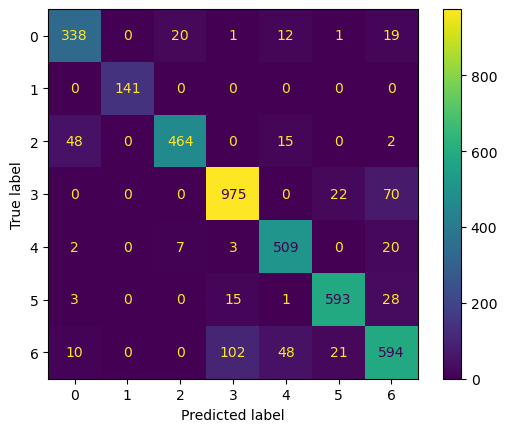

In [60]:
from sklearn.linear_model import LogisticRegression

#Model
lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)

#train pred
y_pred_train_lr= lr.predict(X_train)

#accuracy score
print("Accuracy score for Multinomial Logistic Regression on train:", accuracy_score(y_train, y_pred_train_lr))

#precision score
print("Precision score for Multinomial Logistic Regression on train:", precision_score(y_train, y_pred_train_lr,average='weighted'))

#recall score
print("Recall Score For Multinomial Logistic Regression on train : ", recall_score(y_train, y_pred_train_lr, average="weighted"))

#predict
y_pred_lr = lr.predict(X_test)

#accuracy score
print("Accuracy score for Multinomial Logistic Regression on valid :", accuracy_score(y_test, y_pred_lr))

#precision score
print("Precision score for Multinomial Logistic Regression on valid :", precision_score(y_test,y_pred_lr,average='weighted'))

#recall score
print("Recall Score For Multinomial Logistic Regression on valid : ", recall_score(y_test, y_pred_lr, average="weighted"))

#Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lr)).plot()

Accuracy score for ANN on train: 0.8514747559567545
Precision score for ANN on train: 0.8598158330761935
Recall Score For ANN on train :  0.8514747559567545
Accuracy score for ANN on valid : 0.8410871694417238
Precision score for ANN on valid : 0.8527784928419656
Recall Score For ANN on valid :  0.8410871694417238


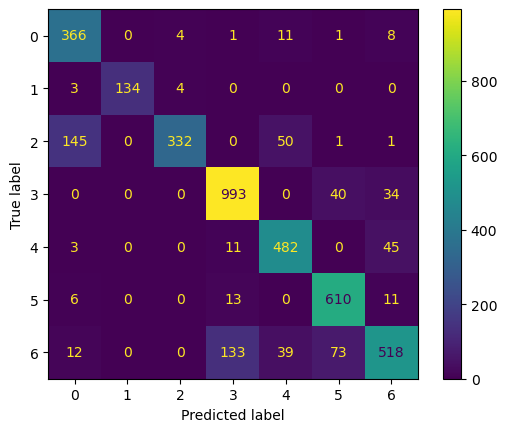

In [61]:
from sklearn.neural_network import MLPClassifier

#Model
ann = MLPClassifier(hidden_layer_sizes=(32,), activation='identity')
ann.fit(X_train, y_train)

#train pred
y_pred_train_ann= ann.predict(X_train)

#accuracy score
print("Accuracy score for ANN on train:", accuracy_score(y_train, y_pred_train_ann))

#precision score
print("Precision score for ANN on train:", precision_score(y_train, y_pred_train_ann,average='weighted'))

#recall score
print("Recall Score For ANN on train : ", recall_score(y_train, y_pred_train_ann, average="weighted"))

#predict
y_pred_ann = ann.predict(X_test)

#accuracy score
print("Accuracy score for ANN on valid :", accuracy_score(y_test, y_pred_ann))

#precision score
print("Precision score for ANN on valid :", precision_score(y_test,y_pred_ann,average='weighted'))

#recall score
print("Recall Score For ANN on valid : ", recall_score(y_test, y_pred_ann, average="weighted"))

#Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ann)).plot()

Sau khi giảm chiều thì cả 3 mô hình đều tăng các đánh giá  

- Mô hình mạng nơ ron được cải thiện rõ rệt nhất khi bỏ đi các trường không cần thiết